The continuous equation for one-species case reads
$$
\partial_t \rho = -\frac{1}{2D_r} \nabla\left(v\nabla (v\rho)\right),
$$
where
$$
v(\rho) = v_0\left(1+\kappa \tanh \left(\frac{\eta}{\kappa}\frac{\rho-\rho_0}{\rho_0}\right)\right)
$$

Around the homogenous phase $\rho(\mathbf{r})=\bar{\rho}+\delta \rho(\mathbf{r})$, we get
$$
\partial_t \delta\rho = -\frac{\bar{v}}{2D_r} \left(\bar{v}\nabla^2 \delta\rho + \bar{\rho} \nabla^2 \delta v\right) = -\frac{\bar{v}}{2D_r} \left(\bar{v}+\bar{\rho}v'(\bar{\rho})\right)\nabla^2 \delta\rho,
$$
where $\bar{v}=v(\bar{\rho})$ and $v'(\rho)=\frac{\partial v(\rho)}{\partial \rho}$. The condition for the instability is
$$
\frac{\bar{\rho} v'(\bar{\rho})}{\bar{v}} < -1,
$$
where
$$
v'(\bar{\rho}) = \frac{v_0\eta}{\rho_0}\left(1-\tanh^2 \left(\frac{\eta}{\kappa}\frac{\bar{\rho}-\rho_0}{\rho_0}\right)\right) = \frac{v_0\eta}{\rho_0} \left( 1 - \left(\frac{\bar{v}-v_0}{v_0\kappa}\right)^2\right)
$$

The condition for the instability becomes
$$
\frac{\bar{\rho}}{\rho_0} \frac{v_0}{\bar{v}} \eta \left(1- \left(\frac{\bar{v}-v_0}{v_0\kappa}\right)^2\right) < -1
$$

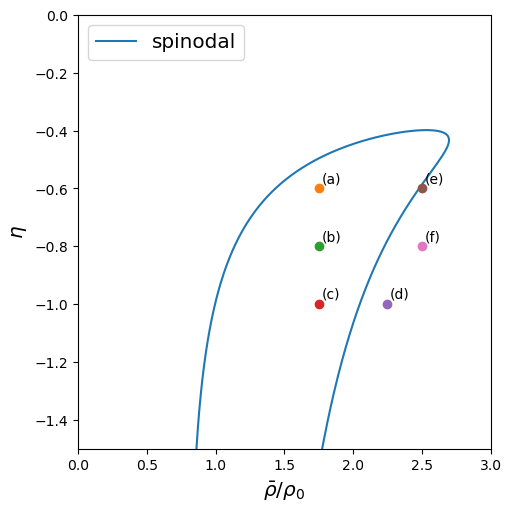

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from skimage import measure

def func(eta, rho_tilde, kappa):
    # tmp = np.tanh(eta / kappa * (rho_tilde - 1))
    # return 1 + kappa * tmp + eta * rho_tilde * (1 - tmp ** 2)
    v_bar = 1 + kappa * np.tanh(eta/kappa * (rho_tilde - 1))
    return 1 + rho_tilde / v_bar * eta * (1 - ((v_bar-1)/kappa)**2)



# rho_tilde_array = np.linspace(1, 10, 40)
# eta_array = np.zeros_like(rho_tilde_array)

# for i, rho_tilde in enumerate(rho_tilde_array):
#     if i == 0:
#         x0 = -1
#     else:
#         x0 = eta_array[i-1]
#     sol = root_scalar(func, args=(rho_tilde, 0.7))
#     # eta_array[i] = sol.root
#     print(sol.root)

# root_scalar(func, args=(1, 0.7), method="newton", x0=-1, fprime=True)

# plt.plot(rho_tilde_array, eta_array)
# plt.show()
# plt.close()

# fsolve(func, [-1], args=(1, 0.7))

ncols = 200
nrows = 200
extent = [0, 3, -1.5, 0]
xx, yy = np.meshgrid(np.linspace(extent[0], extent[1], ncols), np.linspace(extent[2], extent[3], nrows))
sigma = func(yy, xx, 0.7)

# plt.imshow(sigma, origin="lower", vmin=-0.1, vmax=0.1, cmap="bwr", extent=[0, 4, -4, 0])
# plt.colorbar()
# plt.show()
# plt.close()

fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)
contours = measure.find_contours(sigma, level=0)
for contour in contours:
    x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
    y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
    ax.plot(x, y, label="spinodal")
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])

points = [
    [35/20, -0.6],
    [35/20, -0.8],
    [35/20, -1],
    [45/20, -1],
    [50/20, -0.6],
    [50/20, -0.8]
]

ax.legend(fontsize='x-large', loc="upper left")
ax.set_xlabel(r"$\bar{\rho}/\rho_0$", fontsize="x-large")
ax.set_ylabel(r"$\eta$", fontsize="x-large")

labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
for i, (x, y) in enumerate(points):
    ax.plot(x, y, "o")
    ax.text(x+0.02, y+0.02, labels[i])
plt.show()
plt.close()

